# Data cleansing and feature engineering

## Getting to know the data

Let's start importing the necessary libraries and loading the dataset.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from marketing_case.config import RAW_DATA_FILE, INTERIM_DATA_FILE
from marketing_case.utils import inspect_outliers

In [2]:
df = pd.read_csv(RAW_DATA_FILE, sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
with pd.option_context(
    "display.float_format", "{:.2f}".format, "display.max_columns", None
):
    display(df.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


As can be seen, the target variable, the `Response` column, is imbalanced. We will address this issue later and it will be important during the training of the model.

We see that the columns `Z_CostContact` and `Z_Revenue` have zero standard deviation, which means that they have the same value for all samples. As described in the case description (see the references folder), these columns represent the cost and revenue generated by the sales team in the pilot campaign.

These two columns will not be useful for the machine learning model, so we will drop them. However, we will use the cost and the revenue to calculate the profit generated by the sales team in the pilot campaign. This will be done in the last notebook of this series, after the model is trained and evaluated.

In [5]:
# columns with only one unique value (std = 0 if numeric)
df.columns[df.nunique() == 1]

Index(['Z_CostContact', 'Z_Revenue'], dtype='object')

We can also check the categorical columns and the number of unique values in each of them:

In [6]:
df.describe(exclude="number")

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


There are too many unique values for marital status, with 8 different values. We will address this issue later.

Now, let's check the missing values in the dataset:

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# percentage of missing values
df.isnull().mean().mul(100).round(2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

Since there are few missing values, ~1 % and only in one column, we can simply drop them.
We will go on and drop the columns `Z_CostContact` and `Z_Revenue` and the missing values.

In [9]:
# droping columns with only one unique value
df = df.drop(columns=df.columns[df.nunique() == 1])

# droping null values since they are only 1 % of the data
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

It is also a good moment to format the `Dt_Customer` column to a datetime format:

In [11]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [13]:
df["Dt_Customer"].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

As can be seen, the data encompasses a 2 year period, from mid-2012 to mid-2014.


## Feature engineering

Feature engineering is the process of creating new features from the existing ones. This can be done by combining, transforming, or extracting information from the original features. The goal is to create new features that can help the machine learning model to better understand the patterns in the data.

In this notebook, we will create new features based on the existing ones and, also, delete some features. Later, in the following notebooks, we may create more features based on the results of exploratory data analysis and the model's performance.


We can create some new features from the `Dt_Customer` column, such as the number of days and months since the customer was acquired.

In [ ]:
df["DaysSinceEnrolled"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,161


In [ ]:
df["MonthsSinceEnrolled"] = df["DaysSinceEnrolled"] // 30

df["MonthsSinceEnrolled"].value_counts()

MonthsSinceEnrolled
1     109
22    106
8     106
16    104
13    103
15    102
9      99
3      99
17     98
21     98
10     96
19     95
2      94
20     94
11     92
7      91
12     88
4      88
5      87
6      87
14     87
18     84
0      76
23     33
Name: count, dtype: int64

Since we have the `Year_Birth` column, we can also calculate the age of the customers. This can be useful later when we are going to create personas for the customers, segmenting them.

In [ ]:
df["Age"] = df["Dt_Customer"].max().year - df["Year_Birth"]

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled,MonthsSinceEnrolled,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,663,22,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,113,3,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,312,10,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,139,4,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,161,5,33


In [ ]:
df["Age"].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Besides the age itself, we can also create age groups, which can be useful for the model to capture different behaviors from different age groups:

In [ ]:
# age groups 18-30, 31-45, 46-60, 61+
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18, 30, 45, 60, df["Age"].max()],
    labels=["18-30", "31-45", "46-60", "61+"],
    include_lowest=True,
)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled,MonthsSinceEnrolled,Age,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,663,22,57,46-60
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,113,3,60,46-60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,312,10,49,46-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,139,4,30,18-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,161,5,33,31-45


In [ ]:
df["AgeGroup"].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
18-30    257
Name: count, dtype: int64

As can be seen, the age groups are not evenly distributed, with the majority of the customers being in the age group 31-45.

We can check for unusual high values:

In [20]:
df[["Age", "AgeGroup"]][df["Age"] > 100].head()

,Age,AgeGroup
192,114,61+
239,121,61+
339,115,61+


The ages seem unusually high, but they are possible. We will keep them for now. We will perform outlier detection later.

These columns that we created are potentially more useful for the model than the original columns, so we will drop the original columns and keep the new ones.

In [21]:
# droping Dt_Customer column
df = df.drop(columns=["Dt_Customer"])

# droping Year_Birth column
df = df.drop(columns=["Year_Birth"])

In [22]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DaysSinceEnrolled', 'MonthsSinceEnrolled',
       'Age', 'AgeGroup'],
      dtype='object')

Now, let's focus on the columns that represent the amount spent by the customers in the different categories:

In [23]:
df.columns[df.columns.str.startswith("Mnt")]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [24]:
df.loc[:, df.columns.str.startswith("Mnt")]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


The case description divides the products into 2 great categories: regular and gold products. We can create new features that represent the total amount spent by the customers in each of these categories. Actually, we already have the total for the gold products, which is the `MntGoldProds` column. We can create the total for all products and the total for the regular products:

In [ ]:
df["MntTotal"] = df.loc[:, df.columns.str.startswith("Mnt")].sum(axis=1)

df["MntRegularProds"] = df["MntTotal"] - df["MntGoldProds"]

df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled,MonthsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,1,663,22,57,46-60,1617,1529
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,113,3,60,46-60,27,21
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,312,10,49,46-60,776,734
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,139,4,30,18-30,53,48
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,161,5,33,31-45,422,407


It's interesting that the dataset has columns to represent the number of kids and the number of teenagers in the household. We can create a new feature that represents the total number of kids and teenagers in the household, summing these two columns as simply children:

In [ ]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Children"].value_counts()

Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

It is not unusual that having children in the household can influence the amount spent by the customers in the different categories. So, a column simply stating whether the customer has children or not can be useful for the model:

In [27]:
df["HasChildren"] = df["Children"].apply(lambda x: 1 if x > 0 else 0)

df["HasChildren"].value_counts()

HasChildren
1    1583
0     633
Name: count, dtype: int64

Earlier, we saw that the marital status column has 8 unique values. We can group these values into fewer categories. Typically, what really matters is whether the customer has a partner or not. So, we can group the values into 2 categories: Partner and Single:

In [28]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [29]:
df["Marital_Status"] = df["Marital_Status"].replace(
    {
        "Alone": "Single",
        "Absurd": "Single",
        "YOLO": "Single",
        "Together": "Partner",
        "Married": "Partner",
        "Widow": "Single",
        "Single": "Single",
        "Divorced": "Single",
    }
)

df["Marital_Status"].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

In [ ]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

The dataset has columns for 5 previous campaigns. We can create a new feature that represents the total number of campaigns the customer accepted the offer. Also, we can create a boolean column that states whether the customer accepted at least one offer or not:

In [ ]:
df["AcceptedCmpTotal"] = df.loc[:, df.columns.str.startswith("AcceptedCmp")].sum(axis=1)

df["AcceptedCmpTotal"].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [ ]:
df["HasAcceptedCmp"] = df["AcceptedCmpTotal"].apply(lambda x: 1 if x > 0 else 0)

df["HasAcceptedCmp"].value_counts()

HasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

We can create a feature for the total number of purchases made by the customer:

In [33]:
df.columns[df.columns.str.startswith("Num")]

Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [ ]:
df["NumTotalPurchases"] = (
    df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
)

df["NumTotalPurchases"].value_counts()

NumTotalPurchases
4     200
6     188
5     179
7     127
3     125
18    102
16     98
14     98
17     88
21     85
20     85
19     85
15     83
11     77
22     75
13     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
0       6
29      6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2216 non-null   int64   
 1   Education            2216 non-null   object  
 2   Marital_Status       2216 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2216 non-null   int64   
 5   Teenhome             2216 non-null   int64   
 6   Recency              2216 non-null   int64   
 7   MntWines             2216 non-null   int64   
 8   MntFruits            2216 non-null   int64   
 9   MntMeatProducts      2216 non-null   int64   
 10  MntFishProducts      2216 non-null   int64   
 11  MntSweetProducts     2216 non-null   int64   
 12  MntGoldProds         2216 non-null   int64   
 13  NumDealsPurchases    2216 non-null   int64   
 14  NumWebPurchases      2216 non-null   int64   
 15  NumCatalogPurchases  2216 

## Outlier detection

In this section, we will detect outliers in the dataset. Outliers are data points that are significantly different from the other data points. They can be caused by errors in the data collection process or they can represent important information. It is important to detect and treat outliers because they can affect the performance of the machine learning model.

Let's check the distribution of the following numerical columns: `Age`, `Income`, `MntTotal` and `NumTotalPurchases`:

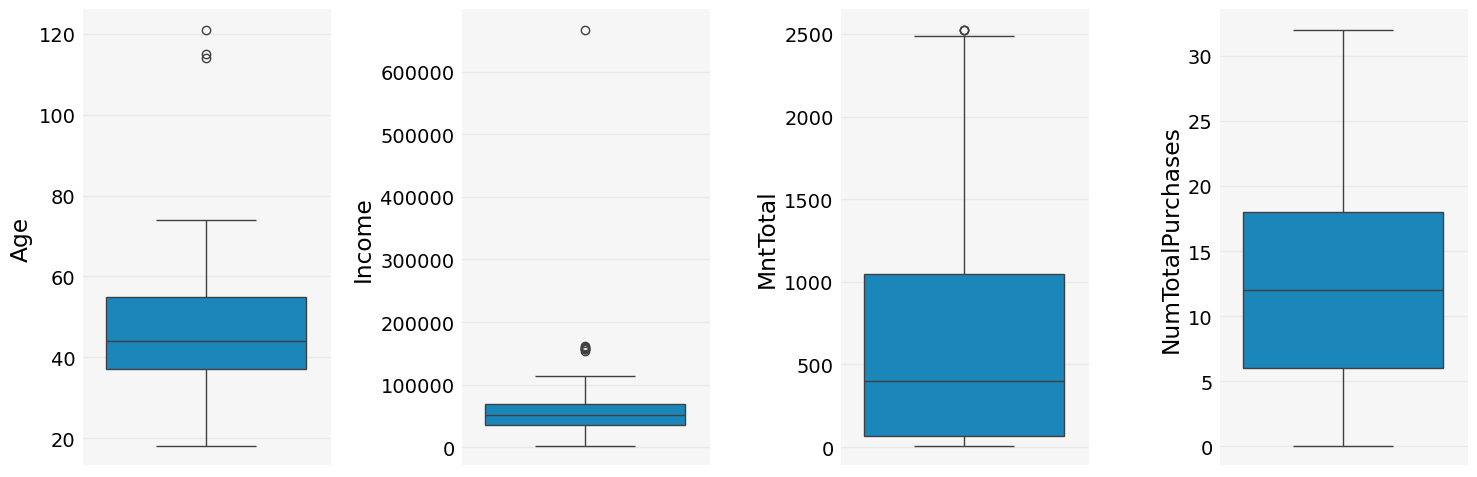

In [36]:
search_outliers_columns = ["Age", "Income", "MntTotal", "NumTotalPurchases"]

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for ax, column in zip(axs.flat, search_outliers_columns):
    sns.boxplot(data=df, y=column, ax=ax)

plt.tight_layout()
plt.show()

It seems that `Age` and `Income` have outliers that differ significantly from the other data points. The `inspect_outliers` function will help us to identify these outliers:

In [37]:
with pd.option_context(
    "display.float_format", "{:.2f}".format, "display.max_columns", None
):
    display(inspect_outliers(df, "Age"))

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled,MonthsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
192,7829,2n Cycle,Single,36640.00,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,276,9,114,61+,65,40,1,1,0,0,5
239,11004,2n Cycle,Single,60182.00,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,43,1,121,61+,22,20,1,1,0,0,3
339,1150,PhD,Partner,83532.00,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,276,9,115,61+,1853,1629,0,0,1,1,14


In [38]:
# droping Age outliers
df = df.drop(inspect_outliers(df, "Age").index)

In [39]:
with pd.option_context(
    "display.float_format", "{:.2f}".format, "display.max_columns", None
):
    display(inspect_outliers(df, "Income"))

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled,MonthsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
164,8475,PhD,Partner,157243.00,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,120,4,41,31-45,1608,1607,1,1,0,0,22
617,1503,PhD,Partner,162397.00,1,1,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,391,13,38,31-45,107,105,2,1,0,0,1
655,5555,Graduation,Single,153924.00,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,142,4,39,31-45,6,5,0,0,0,0,0
687,1501,PhD,Partner,160803.00,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,694,23,32,31-45,1717,1713,0,0,0,0,29
1300,5336,Master,Partner,157733.00,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,390,13,43,31-45,59,51,1,1,0,0,2
1653,4931,Graduation,Partner,157146.00,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,426,14,37,31-45,1730,1729,0,0,0,0,28
2132,11181,PhD,Partner,156924.00,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,304,10,65,61+,8,7,0,0,0,0,0
2233,9432,Graduation,Partner,666666.00,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,392,13,37,31-45,62,50,1,1,0,0,7


In [40]:
# droping Income outliers
df = df.drop(inspect_outliers(df, "Income").index)

In [ ]:
df["Income"].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

Since there are few outliers, we can simply drop them as we did above.

Checking the boxplots again:

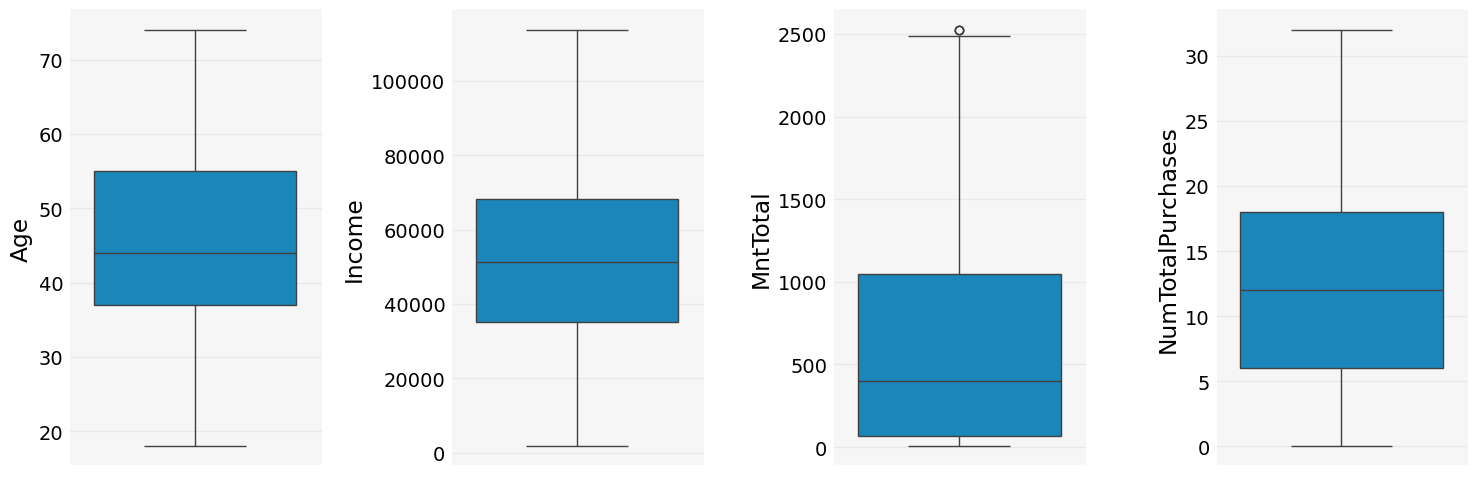

In [42]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for ax, column in zip(axs.flat, search_outliers_columns):
    sns.boxplot(data=df, y=column, ax=ax)

plt.tight_layout()
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2205 non-null   int64   
 1   Education            2205 non-null   object  
 2   Marital_Status       2205 non-null   object  
 3   Income               2205 non-null   float64 
 4   Kidhome              2205 non-null   int64   
 5   Teenhome             2205 non-null   int64   
 6   Recency              2205 non-null   int64   
 7   MntWines             2205 non-null   int64   
 8   MntFruits            2205 non-null   int64   
 9   MntMeatProducts      2205 non-null   int64   
 10  MntFishProducts      2205 non-null   int64   
 11  MntSweetProducts     2205 non-null   int64   
 12  MntGoldProds         2205 non-null   int64   
 13  NumDealsPurchases    2205 non-null   int64   
 14  NumWebPurchases      2205 non-null   int64   
 15  NumCatalogPurchases  2205 

## Categorical columns

Now, let's take care of the categorical columns. It is important to correctly label these columns as categorical so that the machine learning model can understand that they are not numerical values.

The Pandas library has a type called `category` that can be used to represent categorical data. First, let's check the number of unique values in each column:

In [ ]:
# check number of unique values in each column
df.nunique()

ID                     2205
Education                 5
Marital_Status            2
Income                 1963
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                775
MntFruits               158
MntMeatProducts         551
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      13
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
DaysSinceEnrolled       662
MonthsSinceEnrolled      24
Age                      56
AgeGroup                  4
MntTotal               1045
MntRegularProds         897
Children                  4
HasChildren               2
AcceptedCmpTotal          5
HasAcceptedCmp            2
NumTotalPurchases   

For example, let's convert the `Marital_Status` column to a categorical type:

In [ ]:
df["Marital_Status"].unique()

array(['Single', 'Partner'], dtype=object)

In [46]:
# transform Marital_Status into categorical
df["Marital_Status"] = pd.Categorical(
    df["Marital_Status"], categories=["Single", "Partner"]
)

df["Marital_Status"].cat.categories

Index(['Single', 'Partner'], dtype='object')

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MonthsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,22,57,46-60,1617,1529,0,0,0,0,22
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,3,60,46-60,27,21,2,1,0,0,4
2,4141,Graduation,Partner,71613.0,0,0,26,426,49,127,...,10,49,46-60,776,734,0,0,0,0,20
3,6182,Graduation,Partner,26646.0,1,0,26,11,4,20,...,4,30,18-30,53,48,1,1,0,0,6
4,5324,PhD,Partner,58293.0,1,0,94,173,43,118,...,5,33,31-45,422,407,1,1,0,0,14


In [ ]:
df["Marital_Status"].cat.codes[:5]

0    0
1    0
2    1
3    1
4    1
dtype: int8

As shown above, the `category` type is now being used to represent the `Marital_Status` column. Internally, Pandas uses integers to represent the categories, which can be seen by accessing the `cat.codes` attribute.

We can do the same procedure for the other columns with 2 unique values:

In [ ]:
# get columns with 2 unique values that are not categorical
df.columns[(df.nunique() == 2) & (df.dtypes != "category")]

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'HasChildren',
       'HasAcceptedCmp'],
      dtype='object')

In [ ]:
# transform these columns into categorical
for column in df.columns[(df.nunique() == 2) & (df.dtypes != "category")]:
    df[column] = pd.Categorical(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2205 non-null   int64   
 1   Education            2205 non-null   object  
 2   Marital_Status       2205 non-null   category
 3   Income               2205 non-null   float64 
 4   Kidhome              2205 non-null   int64   
 5   Teenhome             2205 non-null   int64   
 6   Recency              2205 non-null   int64   
 7   MntWines             2205 non-null   int64   
 8   MntFruits            2205 non-null   int64   
 9   MntMeatProducts      2205 non-null   int64   
 10  MntFishProducts      2205 non-null   int64   
 11  MntSweetProducts     2205 non-null   int64   
 12  MntGoldProds         2205 non-null   int64   
 13  NumDealsPurchases    2205 non-null   int64   
 14  NumWebPurchases      2205 non-null   int64   
 15  NumCatalogPurchases  2205 

There are other columns with more than 2 unique values. We can convert them to the `category` type as well:

In [ ]:
# get columns with 5 or less unique values that are not categorical
df.columns[(df.nunique() <= 5) & (df.dtypes != "category")]

Index(['Education', 'Kidhome', 'Teenhome', 'Children', 'AcceptedCmpTotal'], dtype='object')

The `Education` columns has 5 unique values. And one might say that there is an order in the values, from the lowest to the highest level of education. We can convert this column to a categorical type and specify the order of the categories:

In [52]:
# transform these columns into categorical but keep the order
for column in df.columns[(df.nunique() <= 5) & (df.dtypes != "category")]:
    if column == "Education":
        df[column] = pd.Categorical(
            df[column],
            categories=[
                "Basic",
                "2n Cycle",
                "Graduation",
                "Master",
                "PhD",
            ],
            ordered=True,
        )
    else:
        df[column] = pd.Categorical(df[column], ordered=True)

## Memory optimization and final dataset export


All numerical columns, except for the `Income` column, contain integer values as int64. We can diminish the memory usage by converting the integer columns to an integer type with less memory usage:

In [53]:
# downcasting integer columns
for column in df.select_dtypes(include="integer").columns:
    df[column] = pd.to_numeric(df[column], downcast="integer")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2205 non-null   int16   
 1   Education            2205 non-null   category
 2   Marital_Status       2205 non-null   category
 3   Income               2205 non-null   float64 
 4   Kidhome              2205 non-null   category
 5   Teenhome             2205 non-null   category
 6   Recency              2205 non-null   int8    
 7   MntWines             2205 non-null   int16   
 8   MntFruits            2205 non-null   int16   
 9   MntMeatProducts      2205 non-null   int16   
 10  MntFishProducts      2205 non-null   int16   
 11  MntSweetProducts     2205 non-null   int16   
 12  MntGoldProds         2205 non-null   int16   
 13  NumDealsPurchases    2205 non-null   int8    
 14  NumWebPurchases      2205 non-null   int8    
 15  NumCatalogPurchases  2205 

The parquet format is a columnar storage format that is efficient for reading and writing data. It is a good choice for storing datasets keeping the data types and the metadata. We can export the final dataset to a parquet file:

In [54]:
# fastparquet is better to handle the category type
df.to_parquet(INTERIM_DATA_FILE, index=False, engine="fastparquet")